# 1. Import Library

In [ ]:
%pip install your_library_name

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import tree

# 2. Load Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Analyst - Science /Loan Decision 3/loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


# 3. Eksplorasi Data

In [ ]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical columns identified:", numerical_cols)

Numerical columns identified: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']


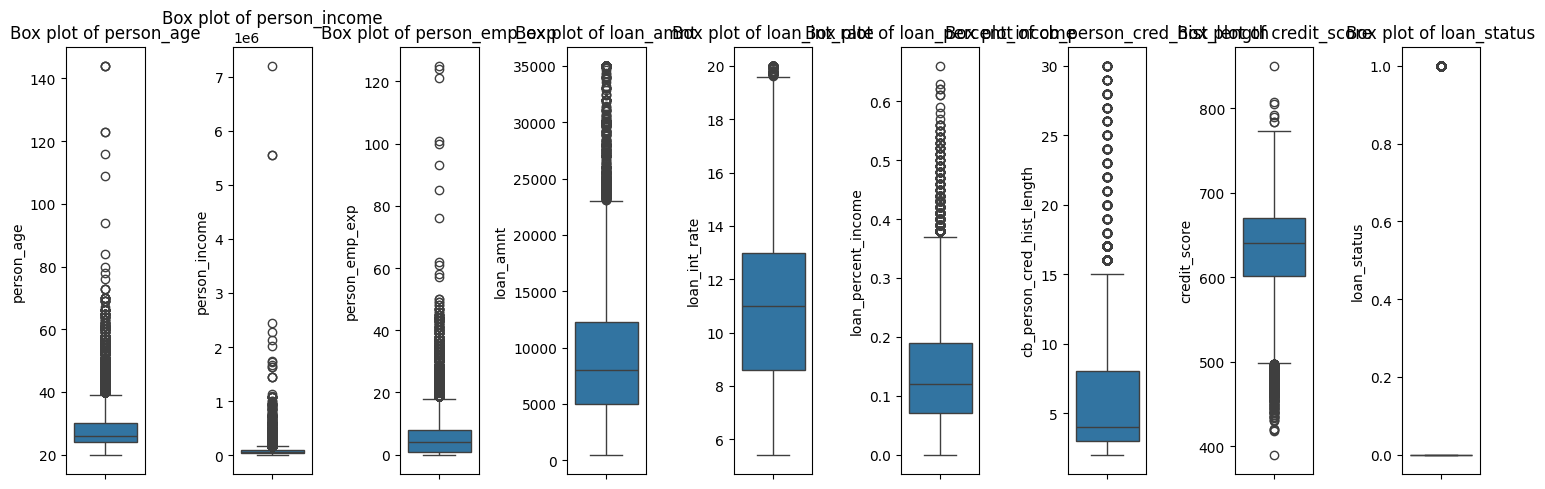

In [ ]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

Handle Outliers

In [ ]:
df['status'] = df['loan_status'].map({0: 'ditolak', 1: 'diterima'})
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1,diterima
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0,ditolak
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1,diterima
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1,diterima
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1,diterima


/tmp/ipython-input-3401835938.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='status', data=df, palette='coolwarm')


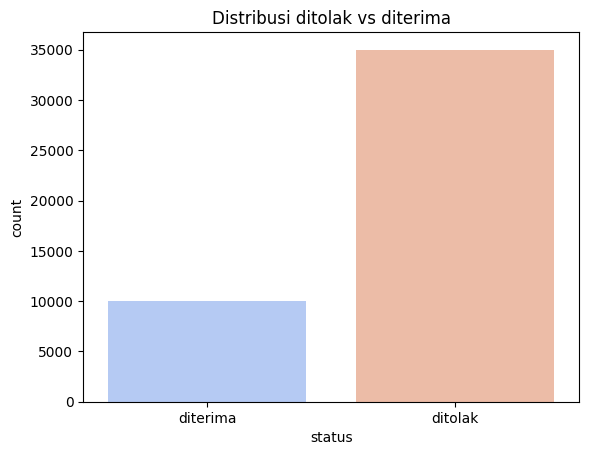

In [ ]:
sns.countplot(x='status', data=df, palette='coolwarm')
plt.title('Distribusi ditolak vs diterima')
plt.show()


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Define the order for 'person_education'
education_order = ['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate']
encoder = OrdinalEncoder(categories=[education_order], handle_unknown='use_encoded_value', unknown_value=-1)

# Create a copy to avoid modifying original df directly if it's used elsewhere
df_processed = df.copy()

# Apply Ordinal Encoding to 'person_education'
df_processed['person_education_encoded'] = encoder.fit_transform(df_processed[['person_education']])

# Drop the original 'person_education' column
df_processed = df_processed.drop('person_education', axis=1)

# Apply One-Hot Encoding to remaining nominal categorical columns
# Identify nominal columns (excluding 'loan_status' and 'status_ditolak' if they are still present here before final drop)
categorical_cols_nominal = df_processed.select_dtypes(include='object').columns.tolist()

df_encoded = pd.get_dummies(df_processed, columns=categorical_cols_nominal, drop_first=True)

# Ensure 'status_ditolak' is dropped if it gets re-created or exists
if 'status_ditolak' in df_encoded.columns:
    df_encoded = df_encoded.drop('status_ditolak', axis=1)

df_encoded.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_education_encoded,person_gender_male,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,3.0,False,False,False,True,False,False,False,True,False,False
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,0.0,False,False,True,False,True,False,False,False,False,True
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,0.0,False,False,False,False,False,False,True,False,False,False
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,2.0,False,False,False,True,False,False,True,False,False,False
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1,3.0,True,False,False,True,False,False,True,False,False,False


In [ ]:
for col in df_encoded.select_dtypes(include='bool').columns:
    df_encoded[col] = df_encoded[col].astype(int)

df_encoded.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_education_encoded,person_gender_male,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,3.0,0,0,0,1,0,0,0,1,0,0
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,0.0,0,0,1,0,1,0,0,0,0,1
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,0.0,0,0,0,0,0,0,1,0,0,0
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,2.0,0,0,0,1,0,0,1,0,0,0
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1,3.0,1,0,0,1,0,0,1,0,0,0


In [ ]:
X = df_encoded.drop(['loan_status'], axis=1)
y = df_encoded['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (36000, 19)
Shape of X_test: (9000, 19)
Shape of y_train: (36000,)
Shape of y_test: (9000,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10]
}

# Instantiate a DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

print("GridSearchCV fitting complete.")

GridSearchCV fitting complete.


In [ ]:
print("Best parameters found: ", grid_search.best_params_)

print("Best accuracy score: ", grid_search.best_score_)

Best parameters found:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 20}
Best accuracy score:  0.9176944444444445


In [ ]:
best_dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=10,
    min_samples_leaf=4,
    min_samples_split=20,
    random_state=42
)

best_dt.fit(X_train, y_train)

y_pred = best_dt.predict(X_test)

print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧩 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Accuracy Score: 0.9225555555555556

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      6990
           1       0.88      0.75      0.81      2010

    accuracy                           0.92      9000
   macro avg       0.91      0.86      0.88      9000
weighted avg       0.92      0.92      0.92      9000


🧩 Confusion Matrix:
 [[6787  203]
 [ 494 1516]]


In [ ]:
model = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [ ]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9216
Precision: 0.8817
Recall: 0.7493
F1-Score: 0.8101
ROC-AUC Score: 0.9617

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6990
           1       0.88      0.75      0.81      2010

    accuracy                           0.92      9000
   macro avg       0.91      0.86      0.88      9000
weighted avg       0.92      0.92      0.92      9000



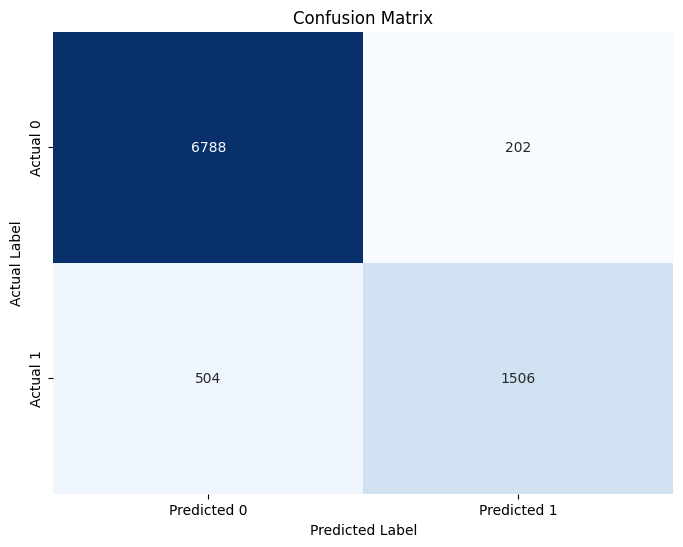

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

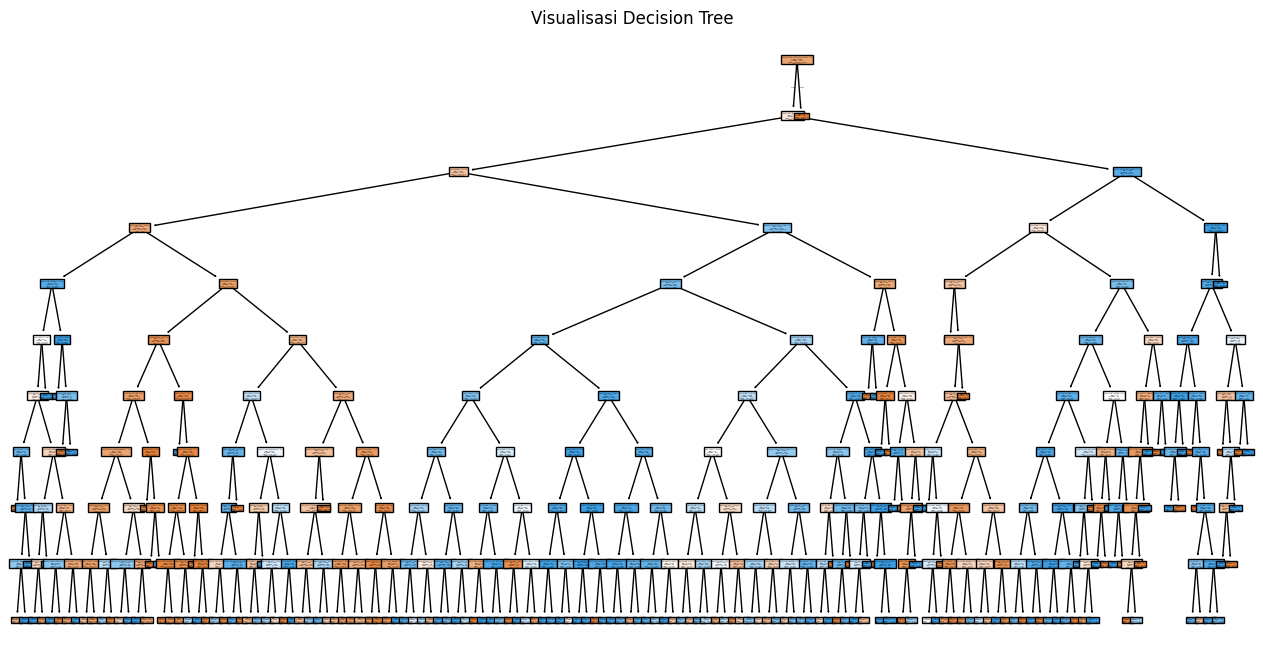

In [ ]:
plt.figure(figsize=(16,8))
tree.plot_tree(model, feature_names=X.columns, class_names=['ditolak','diterima'], filled=True)
plt.title('Visualisasi Decision Tree')
plt.show()

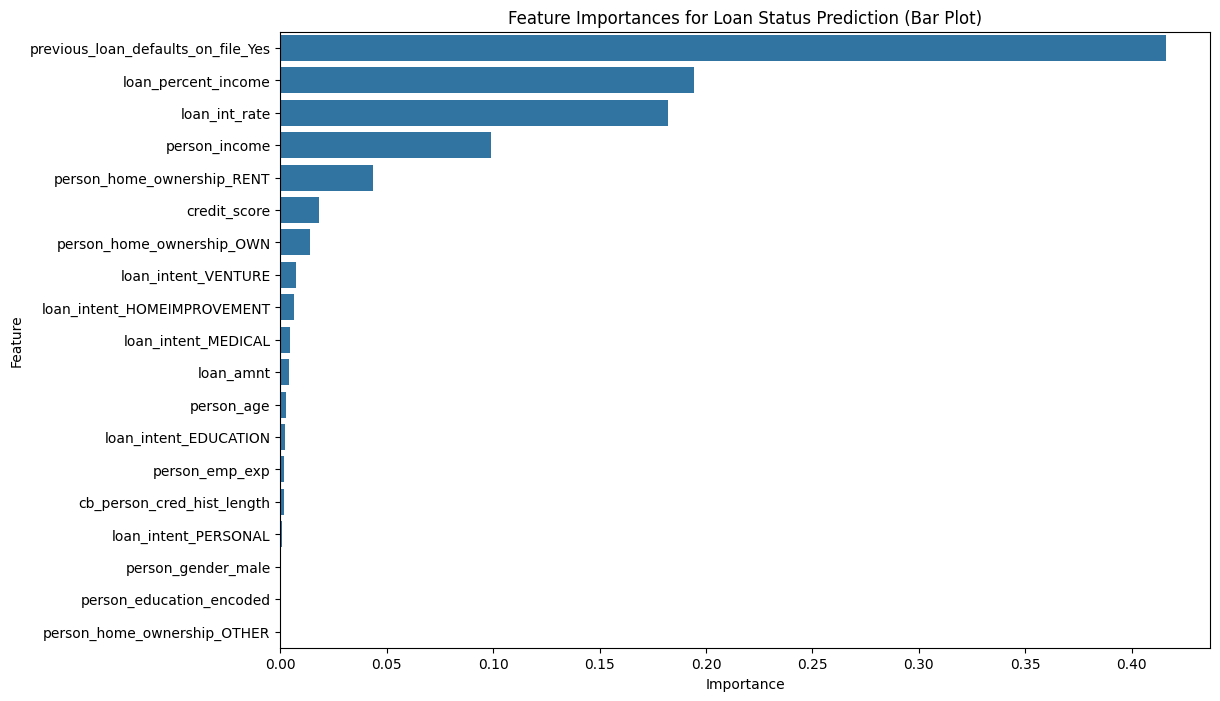

Top 10 Most Important Features:
                               Feature  Importance
18  previous_loan_defaults_on_file_Yes    0.416153
5                  loan_percent_income    0.194346
4                        loan_int_rate    0.182229
1                        person_income    0.099036
12          person_home_ownership_RENT    0.043445
7                         credit_score    0.018117
11           person_home_ownership_OWN    0.013905
17                 loan_intent_VENTURE    0.007603
14         loan_intent_HOMEIMPROVEMENT    0.006495
15                 loan_intent_MEDICAL    0.004676


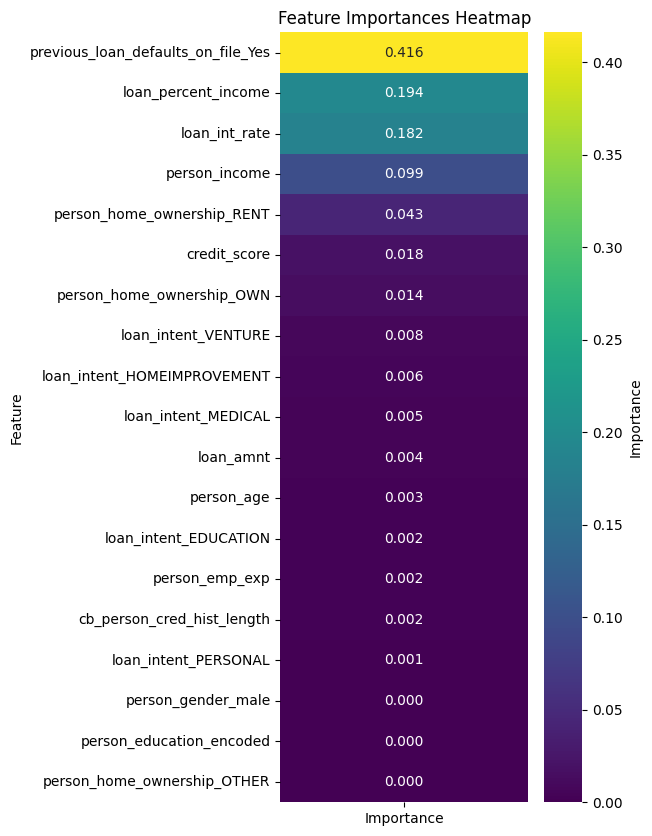

In [ ]:
feature_importances = model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances for Loan Status Prediction (Bar Plot)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

print("Top 10 Most Important Features:")
print(importance_df.head(10))

# Heatmap visualization of feature importances
plt.figure(figsize=(4, 10)) # Adjust figure size for better readability
sns.heatmap(importance_df.set_index('Feature'), annot=True, cmap='viridis', fmt=".3f", cbar_kws={'label': 'Importance'})
plt.title('Feature Importances Heatmap')
plt.ylabel('Feature')
plt.show()

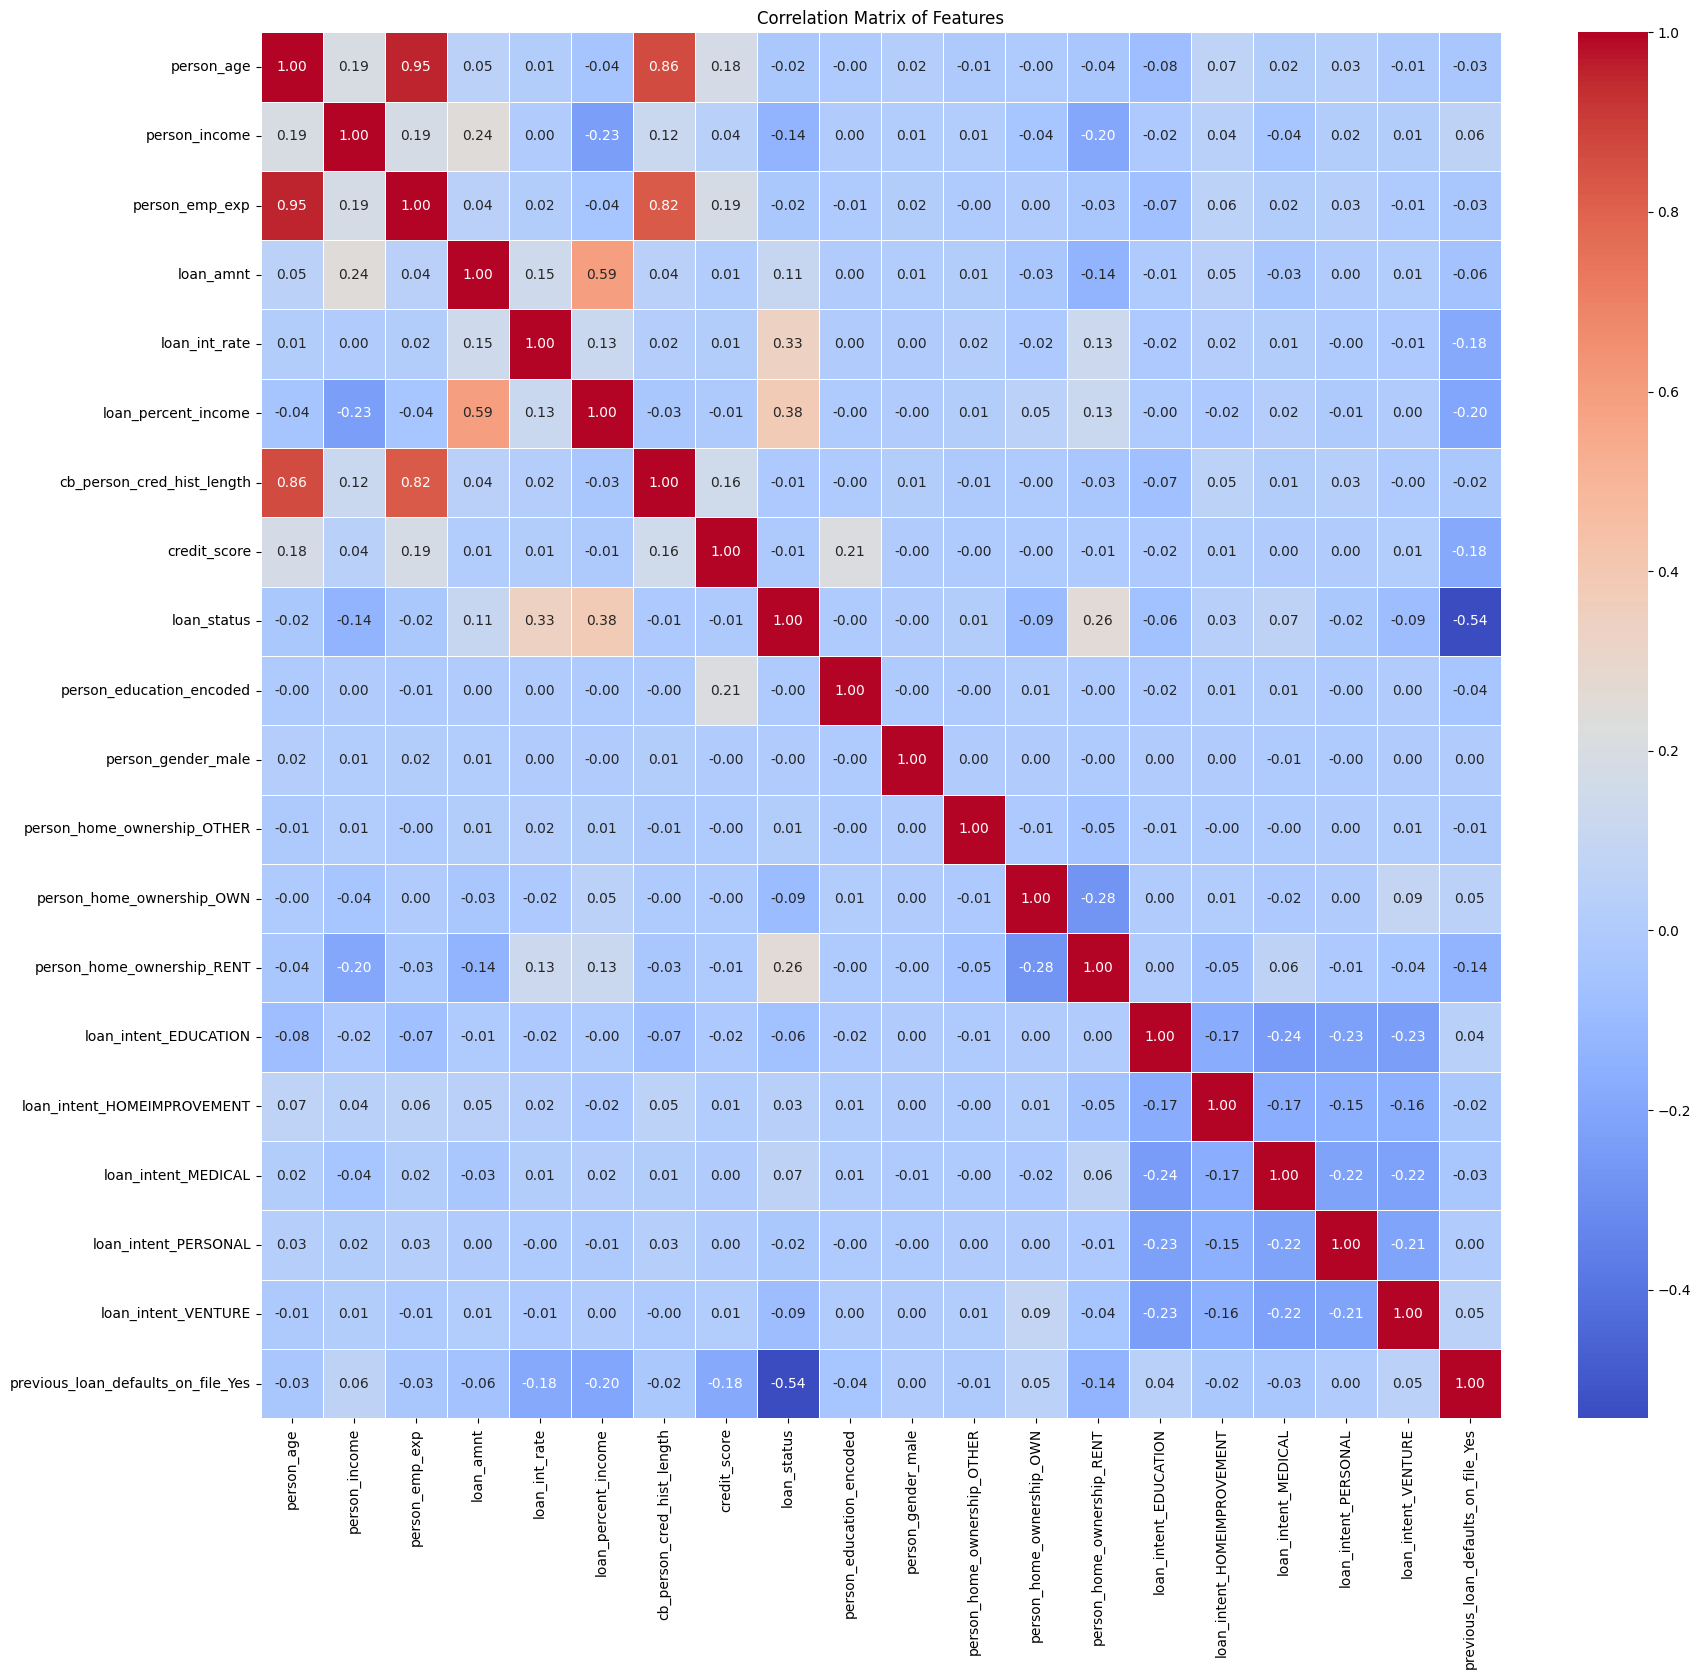

In [ ]:
plt.figure(figsize=(20, 18))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
correlation_with_loan_status = df_encoded.corr()['loan_status'].sort_values(ascending=False)

# Filter for positive correlations (excluding loan_status itself)
positive_correlations = correlation_with_loan_status[correlation_with_loan_status > 0]
positive_correlations = positive_correlations.drop('loan_status', errors='ignore')

print("Features with the strongest positive correlation with loan_status (1/diterima):")
print(positive_correlations)

Features with the strongest positive correlation with loan_status (1/diterima):
loan_percent_income            0.384880
loan_int_rate                  0.332005
person_home_ownership_RENT     0.255239
loan_amnt                      0.107714
loan_intent_MEDICAL            0.065195
loan_intent_HOMEIMPROVEMENT    0.033838
person_home_ownership_OTHER    0.013645
Name: loan_status, dtype: float64


In [ ]:
# --- Input New Loan Application Data Here ---
# Please modify the values below for the new loan application.
# Only provide values for the specified features:
# loan_percent_income, loan_int_rate, person_home_ownership, loan_amnt, person_income
new_loan_data_raw = {
    'loan_percent_income': 0.49,
    'loan_int_rate': 16.02,
    'person_home_ownership': 'RENT',
    'loan_amnt': 35000.0,
    'person_income': 71948.0,
    'previous_loan_defaults_on_file': 'No'
}

# Convert new raw data to DataFrame
new_df = pd.DataFrame([new_loan_data_raw])

# Apply one-hot encoding to the new data, similar to how df_encoded was created
# We need to make sure all columns from X (training data) are present in new_df_encoded
new_df_encoded = pd.get_dummies(new_df, drop_first=True)

# Align columns - crucial step to ensure the new data has the exact same columns as the training data
# This fills missing columns with 0 and drops extra columns if any
new_df_aligned = new_df_encoded.reindex(columns=X.columns, fill_value=0)

# Make prediction
predicted_status_numeric = model.predict(new_df_aligned)
predicted_status_proba = model.predict_proba(new_df_aligned)

# Map numerical prediction back to 'ditolak' or 'diterima'
prediction_label = 'diterima' if predicted_status_numeric[0] == 1 else 'ditolak'

print(f"Predicted Loan Status (numeric): {predicted_status_numeric[0]}")
print(f"Predicted Loan Status: {prediction_label}")
print(f"Probabilities (ditolak, diterima): {predicted_status_proba[0]}")

Predicted Loan Status (numeric): 1
Predicted Loan Status: diterima
Probabilities (ditolak, diterima): [0. 1.]
